# IE 598 Group Project Part 1: Classification

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline

In [2]:
# Load data
data = pd.read_csv('MLF_GP1_CreditScore.csv')
data.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [3]:
# We have known that this data is very clean, so there is no need to do more preprocessing works
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
Sales/Revenues              1700 non-null float64
Gross Margin                1700 non-null float64
EBITDA                      1700 non-null float64
EBITDA Margin               1700 non-null float64
Net Income Before Extras    1700 non-null float64
Total Debt                  1700 non-null float64
Net Debt                    1700 non-null float64
LT Debt                     1700 non-null float64
ST Debt                     1700 non-null float64
Cash                        1700 non-null float64
Free Cash Flow              1700 non-null float64
Total Debt/EBITDA           1700 non-null float64
Net Debt/EBITDA             1700 non-null float64
Total MV                    1700 non-null float64
Total Debt/MV               1700 non-null float64
Net Debt/MV                 1700 non-null float64
CFO/Debt                    1700 non-null float64
CFO                         1700 non-null f

## Exploratory Data Analysis 

In [4]:
print('Number of rows of data: ', data.shape[0])
print('Number of columns of data: ', data.shape[1])

Number of rows of data:  1700
Number of columns of data:  28


In [5]:
data.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


In [6]:
print('Number of "Investment Grade" in the data: ', data['InvGrd'].value_counts()[1])
print('Number of "Not Investment Grade" in the data: ', data['InvGrd'].value_counts()[0])

Number of "Investment Grade" in the data:  1287
Number of "Not Investment Grade" in the data:  413


In [7]:
data['Rating'].value_counts()

Baa2    326
Baa3    232
Baa1    179
Aa3     174
A2      156
Ba2     125
A1      122
Ba3     108
B1       69
Aa2      65
B2       48
B3       37
A3       31
Ba1      17
Caa1      9
Aaa       2
Name: Rating, dtype: int64

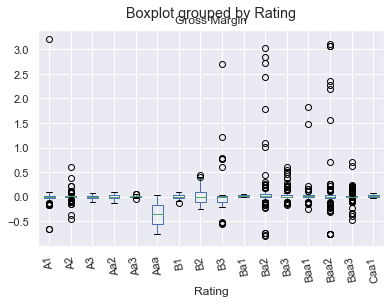

In [8]:
sns.set()
data.boxplot('Gross Margin', 'Rating', rot=100)
plt.show()

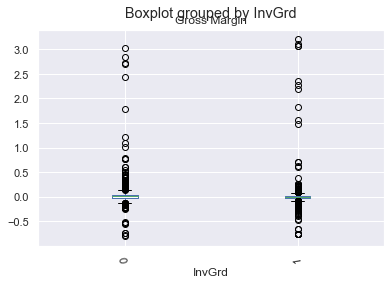

In [9]:
data.boxplot('Gross Margin', 'InvGrd', rot=100)
plt.show()

In [10]:
# Correlation
corMat = pd.DataFrame(data.corr())
corMat

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
Sales/Revenues,1.000000,-0.026318,0.500178,-0.124079,0.012024,0.068938,0.175741,0.048960,0.014987,-0.008088,...,0.034069,0.032716,0.035747,-0.081346,0.553807,0.034722,-0.014842,0.007251,-0.000206,-0.080836
Gross Margin,-0.026318,1.000000,0.114092,0.147886,-0.001061,-0.002665,0.004266,-0.003149,-0.005417,-0.024540,...,-0.055569,-0.002079,-0.011190,-0.022793,0.051386,0.000857,0.029146,-0.001583,0.000182,-0.066103
EBITDA,0.500178,0.114092,1.000000,0.757142,0.012565,0.008949,0.119251,-0.000665,0.004844,-0.030773,...,-0.041064,0.028118,-0.008799,-0.054680,0.207526,0.042191,0.040732,0.007913,-0.005701,-0.085951
EBITDA Margin,-0.124079,0.147886,0.757142,1.000000,0.003331,-0.039804,0.000336,-0.037009,-0.006310,-0.023997,...,-0.075326,0.008147,-0.033862,-0.000036,-0.119068,0.021589,0.071426,0.002072,-0.008328,-0.024112
Net Income Before Extras,0.012024,-0.001061,0.012565,0.003331,1.000000,-0.001065,0.000867,-0.001162,-0.000221,-0.006703,...,0.001832,0.002233,-0.001938,-0.008131,0.004226,0.506547,-0.003166,0.997349,0.782491,-0.027919
Total Debt,0.068938,-0.002665,0.008949,-0.039804,-0.001065,1.000000,-0.022209,0.833567,0.118240,-0.030002,...,0.000924,-0.016078,-0.000801,-0.031600,0.062364,-0.001424,-0.003652,-0.001406,0.000301,-0.090372
Net Debt,0.175741,0.004266,0.119251,0.000336,0.000867,-0.022209,1.000000,-0.021307,0.001191,0.007184,...,0.002762,-0.003566,0.000492,-0.003824,0.059139,0.001046,-0.000371,-0.000709,-0.001965,-0.042195
LT Debt,0.048960,-0.003149,-0.000665,-0.037009,-0.001162,0.833567,-0.021307,1.000000,0.092393,-0.030084,...,0.001270,-0.014810,-0.000532,-0.026573,0.023553,-0.001298,-0.003545,-0.001303,0.000712,-0.061665
ST Debt,0.014987,-0.005417,0.004844,-0.006310,-0.000221,0.118240,0.001191,0.092393,1.000000,-0.012802,...,0.002729,-0.007233,0.000503,-0.023235,0.105872,0.000275,-0.002704,-0.000339,-0.001022,-0.003028
Cash,-0.008088,-0.024540,-0.030773,-0.023997,-0.006703,-0.030002,0.007184,-0.030084,-0.012802,1.000000,...,0.019751,-0.023920,0.023993,0.973123,0.004712,-0.017470,0.034156,-0.006606,-0.000344,-0.088877


In [11]:
# Correlations with InvGrd
corMat.iloc[-1, :]

Sales/Revenues             -0.080836
Gross Margin               -0.066103
EBITDA                     -0.085951
EBITDA Margin              -0.024112
Net Income Before Extras   -0.027919
Total Debt                 -0.090372
Net Debt                   -0.042195
LT Debt                    -0.061665
ST Debt                    -0.003028
Cash                       -0.088877
Free Cash Flow              0.026407
Total Debt/EBITDA          -0.089502
Net Debt/EBITDA            -0.030395
Total MV                   -0.095460
Total Debt/MV              -0.086889
Net Debt/MV                -0.039342
CFO/Debt                    0.052756
CFO                         0.049368
Interest Coverage           0.025277
Total Liquidity            -0.016117
Current Liquidity          -0.093658
Current Liabilities         0.019039
EPS Before Extras           0.027645
PE                         -0.021736
ROA                        -0.023101
ROE                         0.020056
InvGrd                      1.000000
N

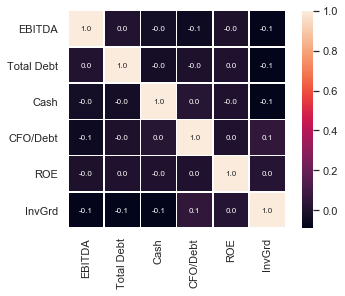

In [12]:
# Heat map
cm = np.corrcoef(data[['EBITDA', 'Total Debt', 'Cash', 'CFO/Debt', 'ROE', 'InvGrd']].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                 linewidths = 0.5,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.1f',
                 annot_kws={'size': 8},
                 yticklabels=['EBITDA', 'Total Debt', 'Cash', 'CFO/Debt', 'ROE', 'InvGrd'],
                 xticklabels=['EBITDA', 'Total Debt', 'Cash', 'CFO/Debt', 'ROE', 'InvGrd'])

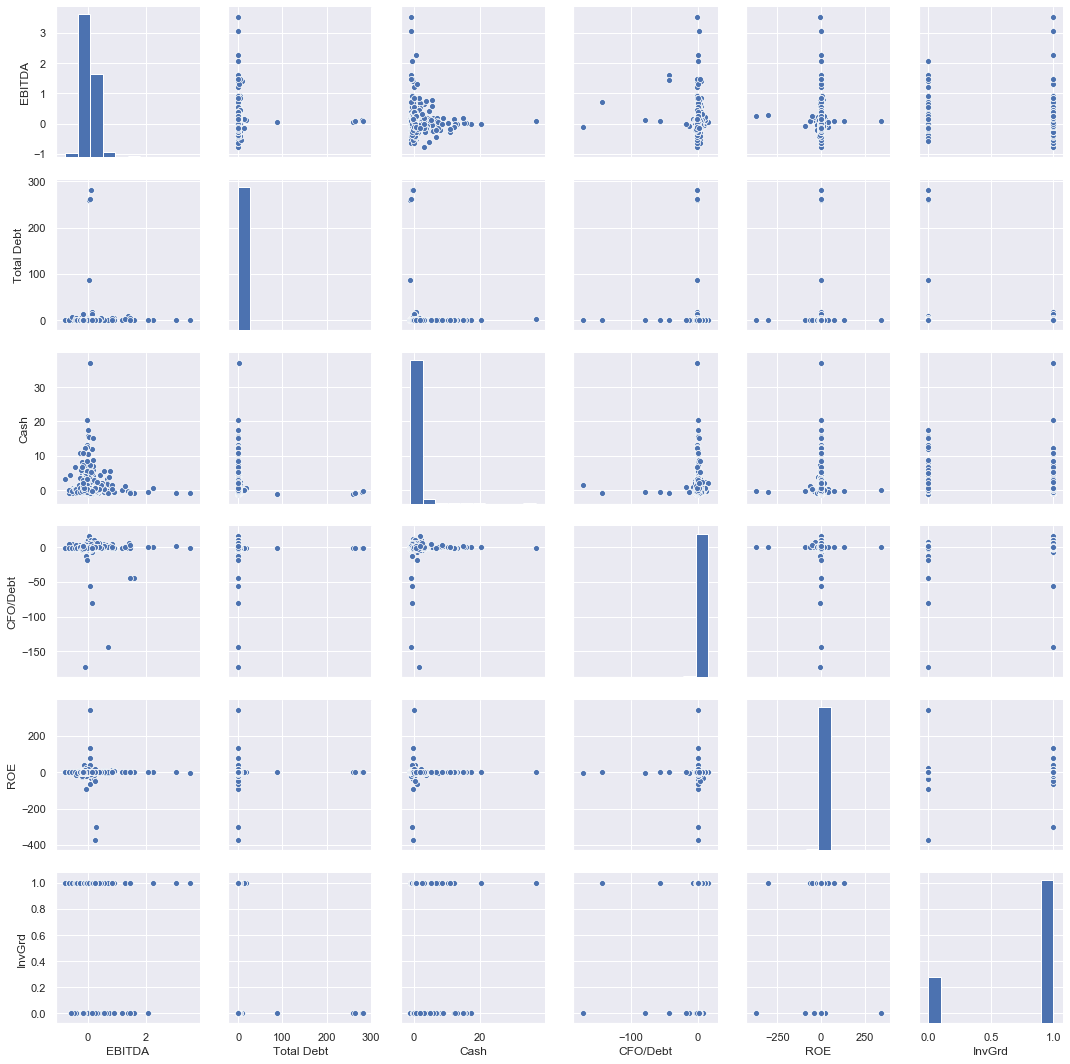

In [13]:
sns.pairplot(data[['EBITDA', 'Total Debt', 'Cash', 'CFO/Debt', 'ROE', 'InvGrd']])

## Model fitting and evaluation - Binary Class

In [4]:
# Split X and y (InvGrd)
X = data[data.columns[:-2]]
y_binary = data['InvGrd']

In [5]:
# Min-Max Normalization
normalized_X = X.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
normalized_X.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.242295,0.205314,0.196771,0.167038,0.376816,0.006108,0.362816,0.007498,0.002031,0.038387,...,0.915179,0.924433,0.007049,0.640736,0.040438,0.155251,0.339919,0.136707,0.391488,0.521100
std,0.055091,0.068486,0.054886,0.038215,0.018866,0.047139,0.020895,0.055887,0.025496,0.048971,...,0.033307,0.032464,0.028753,0.029313,0.053844,0.054615,0.021719,0.027441,0.018703,0.021464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223217,0.193798,0.175646,0.154131,0.376449,0.002926,0.363036,0.002848,0.000324,0.020960,...,0.914934,0.924858,0.004887,0.640734,0.021682,0.125423,0.339266,0.134913,0.391196,0.521077
50%,0.236723,0.199659,0.192323,0.165029,0.376729,0.003217,0.363123,0.003167,0.000510,0.028095,...,0.916123,0.925787,0.005653,0.641537,0.029253,0.148894,0.340039,0.135486,0.391451,0.521375
75%,0.253397,0.205211,0.209677,0.175022,0.376945,0.003679,0.363243,0.003776,0.000808,0.038822,...,0.917391,0.926757,0.006385,0.642485,0.039874,0.173372,0.340639,0.135961,0.391663,0.521685
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# PCA
pca = PCA(n_components=3)
pca.fit(normalized_X)
pca_X = pca.transform(normalized_X)
print(pca_X.shape)

(1700, 3)


In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(pca_X, y_binary, test_size=.3, random_state=42)

### Binary Classification Model 1: SVC 

In [8]:
# GridSearchCV to find the best SVC model
parameters = {'kernel':['linear', 'rbf'], 'C':[0.1, 1, 10, 15, 20], 'gamma':[0.001, 0.01, 0.1, 1, 2, 3]}
svc_model = SVC()
gs = GridSearchCV(svc_model, parameters, cv=10)
gs.fit(X_train, y_train)
print('10-fold Cross Validation: ')
print('SVC Parameters: ', parameters)
print("Tuned SVC Parameter: {}".format(gs.best_params_))
print("Tuned SVC Accuracy: {}".format(gs.best_score_))

10-fold Cross Validation: 
SVC Parameters:  {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10, 15, 20], 'gamma': [0.001, 0.01, 0.1, 1, 2, 3]}
Tuned SVC Parameter: {'C': 15, 'gamma': 3, 'kernel': 'rbf'}
Tuned SVC Accuracy: 0.7672268907563026


In [18]:
# Result on the test set
svc_best = SVC(C=10, gamma=3)
svc_best.fit(X_train, y_train)
y_pred = svc_best.predict(X_test)
print('Accuracy on the test set: ', svc_best.score(X_test, y_test))

Accuracy on the test set:  0.7764705882352941


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.10      0.19       124
           1       0.78      0.99      0.87       386

    accuracy                           0.78       510
   macro avg       0.79      0.55      0.53       510
weighted avg       0.78      0.78      0.70       510



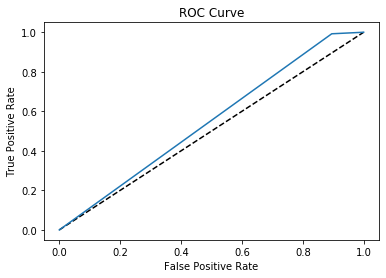

In [11]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [12]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred)))

AUC: 0.5485333444760154


### Binary Classification Model 2:  Logistic Regression

In [11]:
# GridSearchCV to find the best LR model
parameters = {'C':[0.1, 1, 10, 15, 20]}
lr_model = LogisticRegression(solver='lbfgs')
gs = GridSearchCV(lr_model, parameters, cv=10)
gs.fit(X_train, y_train)
print('10-fold Cross Validation: ')
print('Logistic Regression Parameters: ', parameters)
print("Tuned Logistic Regression Parameter: {}".format(gs.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(gs.best_score_))

10-fold Cross Validation: 
Logistic Regression Parameters:  {'C': [0.1, 1, 10, 15, 20]}
Tuned Logistic Regression Parameter: {'C': 15}
Tuned Logistic Regression Accuracy: 0.7621848739495798


In [12]:
# Result on the test set
lr_best = LogisticRegression(C=15, solver='lbfgs')
lr_best.fit(X_train, y_train)
y_pred = lr_best.predict(X_test)
print('Accuracy on the test set: ', lr_best.score(X_test, y_test))

Accuracy on the test set:  0.7647058823529411


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06       124
           1       0.76      1.00      0.87       386

    accuracy                           0.76       510
   macro avg       0.88      0.52      0.46       510
weighted avg       0.82      0.76      0.67       510



### Binary Classification Model 3:  Decision Tree

In [44]:
# GridSearchCV to find the best tree model
parameters = {'max_depth':[3, 4, 5, 7, 10, 20]}
tree_model = DecisionTreeClassifier()
gs = GridSearchCV(tree_model, parameters, cv=10)
gs.fit(X_train, y_train)
print('10-fold Cross Validation: ')
print('Decision Tree Parameters: ', parameters)
print("Tuned Decision Tree Parameter: {}".format(gs.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(gs.best_score_))

10-fold Cross Validation: 
Decision Tree Parameters:  {'max_depth': [3, 4, 5, 7, 10, 20]}
Tuned Decision Tree Parameter: {'max_depth': 5}
Tuned Decision Tree Accuracy: 0.7647058823529411


In [45]:
# Result on the test set
tree_best = DecisionTreeClassifier(max_depth=5)
tree_best.fit(X_train, y_train)
y_pred = tree_best.predict(X_test)
print('Accuracy on the test set: ', tree_best.score(X_test, y_test))

Accuracy on the test set:  0.7705882352941177


### Binary Classification Model 4:  Decison Tree Adaboost

In [46]:
# Using Decision Tree model as the base model
# GridSearchCV to find the best adaboost model
parameters = {'n_estimators':[10, 50, 100, 150, 200]}
ada = AdaBoostClassifier(base_estimator=tree_best, random_state=100)
gs = GridSearchCV(ada, parameters, cv=10)
gs.fit(X_train, y_train)
print('10-fold Cross Validation: ')
print('Adaboost Parameters: ', parameters)
print("Tuned Adaboost Parameter: {}".format(gs.best_params_))
print("Tuned Adaboost Accuracy: {}".format(gs.best_score_))

10-fold Cross Validation: 
Adaboost Parameters:  {'n_estimators': [10, 50, 100, 150, 200]}
Tuned Adaboost Parameter: {'n_estimators': 150}
Tuned Adaboost Accuracy: 0.738655462184874


In [47]:
# Result on the test set
ada_best = AdaBoostClassifier(base_estimator=tree_best, n_estimators=150, random_state=100)
ada_best.fit(X_train, y_train)
y_pred = ada_best.predict(X_test)
print('Accuracy on the test set: ', ada_best.score(X_test, y_test))

Accuracy on the test set:  0.7274509803921568


In [39]:
# The accuracy even lower than the single tree model.
# It might because that the previous tree is strong enough. Boosting results in overfitting.

##  Model fitting and evaluation - Multi Classes 

In [58]:
# Create dummy variables
# data_dummy = pd.get_dummies(data)
# y_dummy = data_dummy[data_dummy.columns[-16:]]
# y_dummy.head()

In [49]:
y_multiclass = data['Rating']

### Multi Classification Model 1:  Logistic Regression 

In [57]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y_multiclass, test_size=.3, random_state=43)

In [59]:
# GridSearchCV to find the best LR model
parameters = {'C':[10, 20, 30, 40, 50, 60, 70]}
lr_model = LogisticRegression()
gs = GridSearchCV(lr_model, parameters, cv=10)
gs.fit(X_train, y_train)
print('10-fold Cross Validation: ')
print("Tuned Logistic Regression Parameter: {}".format(gs.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(gs.best_score_))

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: Fu

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will 

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will 

10-fold Cross Validation: 
Tuned Logistic Regression Parameter: {'C': 40}
Tuned Logistic Regression Accuracy: 0.21260504201680672


C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will 

In [60]:
# Result on the test set
lr_best = LogisticRegression(C=40)
svc_best.fit(X_train, y_train)
y_pred = svc_best.predict(X_test)
print('Accuracy on the test set: ', svc_best.score(X_test, y_test))

Accuracy on the test set:  0.23921568627450981


### Multi Classification Model 2:  Decision Tree 

In [61]:
# GridSearchCV to find the best DT model
parameters = {'criterion':['gini', 'entropy'], 
              'max_depth':[10, 20, 30, 40, 50, 60], 
              'min_samples_split':[2, 3, 4, 5, 6], 
              'min_samples_leaf':[1, 2, 3, 4, 5, 6]}

tree_model = DecisionTreeClassifier()
gs = GridSearchCV(tree_model, parameters, cv=10)
gs.fit(X_train, y_train)
print('10-fold Cross Validation: ')
print("Tuned Decision Tree Parameter: {}".format(gs.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(gs.best_score_))

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


10-fold Cross Validation: 
Tuned Decision Tree Parameter: {'criterion': 'entropy', 'max_depth': 60, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.4


C:\Anaconda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
# Result on the test set
tree_best = DecisionTreeClassifier(criterion='entropy', max_depth=60, min_samples_leaf=1, min_samples_split=2)
tree_best.fit(X_train, y_train)
y_pred = tree_best.predict(X_test)
print('Accuracy on the test set: ', tree_best.score(X_test, y_test))

Accuracy on the test set:  0.396078431372549


### Multi Classification Model 3:  Ridge Classifier 

In [67]:
ridge_clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=10)
ridge_clf.fit(X_train, y_train)
print('10-fold Cross Validation: ')
print("Tuned Ridge Classifier Parameter: {}".format(ridge_clf.get_params()))
print("Tuned Ridge Classifier Accuracy: {}".format(ridge_clf.score(X_train, y_train)))

10-fold Cross Validation: 
Tuned Ridge Classifier Parameter: {'alphas': array([0.001, 0.01 , 0.1  , 1.   ]), 'class_weight': None, 'cv': 10, 'fit_intercept': True, 'normalize': False, 'scoring': None, 'store_cv_values': False}
Tuned Ridge Classifier Accuracy: 0.22016806722689075


C:\Anaconda\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "mul

In [68]:
# Result on the test set
print('Accuracy on the test set: ', ridge_clf.score(X_test, y_test))

Accuracy on the test set:  0.19411764705882353


### Multi Classification Model 4:  Random Forest 

In [91]:
# Random Forest is a bagging model of Decision Tree
# GridSearchCV to find the best RF model 
# This block may take a long time
parameters = {'n_estimators':[400, 450, 500, 550, 600],
              'criterion':['gini', 'entropy'], 
              'max_depth':[40, 45, 50, 55, 60]} 
            # 'min_samples_split':[2, 3, 4, 5], 
            # 'min_samples_leaf':[1, 2, 3, 4, 5]}

rf_model = RandomForestClassifier()
gs = GridSearchCV(rf_model, parameters, cv=10)
gs.fit(X_train, y_train)
print('10-fold Cross Validation: ')
print("Tuned Random Forest Parameter: {}".format(gs.best_params_))
print("Tuned Random Forest Accuracy: {}".format(gs.best_score_))

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


10-fold Cross Validation: 
Tuned Random Forest Parameter: {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 550}
Tuned Random Forest Accuracy: 0.6252100840336134


In [92]:
# Result on the test set
rf_best = RandomForestClassifier(n_estimators=550, criterion='gini', max_depth=50, min_samples_leaf=1, min_samples_split=2)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
print('Accuracy on the test set: ', rf_best.score(X_test, y_test))

Accuracy on the test set:  0.6333333333333333


In [93]:
# In this case, Precision and f1-score are ill-defined
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          A1       0.79      0.61      0.69        31
          A2       0.65      0.56      0.60        43
          A3       0.75      0.43      0.55         7
         Aa2       0.76      0.59      0.67        22
         Aa3       0.67      0.82      0.74        57
         Aaa       0.00      0.00      0.00         2
          B1       0.75      0.40      0.52        15
          B2       0.71      0.45      0.56        11
          B3       0.67      0.20      0.31        10
         Ba1       0.67      0.67      0.67         6
         Ba2       0.71      0.73      0.72        33
         Ba3       0.62      0.42      0.50        38
        Baa1       0.61      0.40      0.49        62
        Baa2       0.61      0.85      0.71       104
        Baa3       0.53      0.70      0.61        67
        Caa1       0.00      0.00      0.00         2

    accuracy                           0.63       510
   macro avg       0.59   

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [95]:
rf_best.classes_

array(['A1', 'A2', 'A3', 'Aa2', 'Aa3', 'B1', 'B2', 'B3', 'Ba1', 'Ba2',
       'Ba3', 'Baa1', 'Baa2', 'Baa3', 'Caa1'], dtype=object)